In [159]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import string
import re
import os
import unidecode as un
import random
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pandas import DataFrame
import seaborn as sn




In [160]:
letters = " abcdefghijklmnopqrstuvwxyz0987654231?%!"
lemmatizer = nltk.WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [161]:
text_data = []
text_label = []

#preprocessing
for folder in os.listdir("bbc"):
    print(folder)
    for filename in os.listdir("bbc/" + folder):
        data = open("bbc/" + folder + "/" + filename, mode='r', encoding="unicode_escape")
        for line in data:
            df = un.unidecode(line).lower()
            for x in df:
                if(x not in letters):
                    df = df.replace(x, '')
            output = ' '.join(
            [lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(w, 'v'), 'n'), 'a') for w in df.rstrip().split()]
            )
        text_label.append(folder)            
        text_data.append(output)
        
        

business
entertainment
politics
sport
tech


In [162]:
def randomOrder(a, b):
    c = list(zip(a, b))
    random.shuffle(c)

    a, b = zip(*c)
    return a, b

In [163]:
text_data, text_label = randomOrder(text_data, text_label)

In [164]:


vectorizer = TfidfVectorizer(min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 3), sublinear_tf=True, stop_words='english')
X = vectorizer.fit_transform(text_data)


tfidf_feature = vectorizer.fit_transform(text_data).toarray()



In [165]:
le = preprocessing.LabelEncoder()
le.fit(text_label)
tr_le = le.transform(text_label)

classes = le.classes_
print(classes)

['business' 'entertainment' 'politics' 'sport' 'tech']


In [166]:
model = RandomForestClassifier(n_estimators= 1000)

X_train, X_test, y_train, y_test= train_test_split(tfidf_feature, tr_le, test_size=0.25, random_state=0)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [167]:
predicted_train = model.predict(X_train)
predicted_test = model.predict(X_test)

In [168]:
print (classification_report(y_test,predicted_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       142
           1       0.91      0.85      0.88        88
           2       0.89      0.92      0.91        99
           3       0.87      0.98      0.92       121
           4       0.95      0.86      0.90       107

    accuracy                           0.91       557
   macro avg       0.91      0.91      0.91       557
weighted avg       0.91      0.91      0.91       557



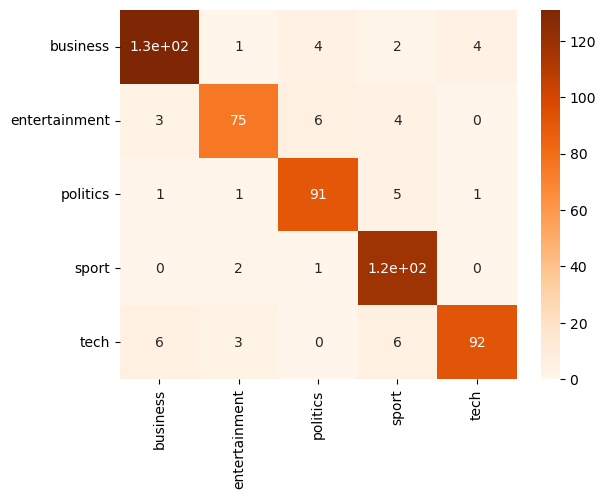

In [169]:
conf_mat = confusion_matrix(y_test, predicted_test)
columns =["business", "entertainment", "politics", "sport", "tech"]

df_cm = DataFrame(conf_mat, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Oranges', annot=True)